# Credit Card Fraud
In this section, we'll look at a credit card fraud detection dataset, and build a binary classification model that can identify transactions as either fraudulent or valid, based on provided, historical data. In a 2016 study, it was estimated that credit card fraud was responsible for over 20 billion dollars in loss, worldwide. Accurately detecting cases of fraud is an ongoing area of research.


## Labeled Data
The credit card fraud data set was downloaded from data.world. This has features and labels for thousands of credit card transactions, each of which is labeled as fraudulent or valid. In this notebook, we'd like to train a model based on the features of these transactions so that we can predict risky or fraudulent transactions in the future.

## Binary Classification
Since we have true labels to aim for, we'll take a supervised learning approach and train a binary classifier to sort data into one of our two transaction classes: fraudulent or valid. We'll train a model on training data and see how well it generalizes on some test data.

The notebook will be broken down into a few steps:
* Loading and exploring the data
* Splitting the data into train/validation/test sets
* Normalising the data, implementing SMOTE to evenly balance the dataset
* Baselining the model
* Trying to run data on multiple models and check confusion matrix
* Evaluating and comparing model test performance
* Tuning and Improving the best 2 model by working on hyperparamenters with an aim to improve specific metric, such as high recall or precision.

### Project Overview

The banking industry works on credit and income from the interest which can be in a form of mortgage, other types of loan, or from Credit Card. As the cost of having credit cards reduced it got broadly accepted in society and many people started having a credit card. As the credit card reached the masses, new ways of fraud also came to existence. Today, CC fraud is a very big problem for the banking industry and it is plaguing financial industries for years, some countries it is less problematic than others 

Solving this problem could bring about a reduced volume of fraudulent transactions in financial industries hereby saving them a huge volume of money lost and this problem can be avoided by using predictive analytics where machine learning algorithms are used to detect fraud patterns and determine future probabilities and trends. 

### Problem Statement 

Each record has multiple columns and in our dataset, there are 31 columns including classification column which confirms if the record is genuine or a fraud. In real-time when the record is asked to be classified it is not realistically with a human eye to do classification.

The objective is to create an ML model that can classify the transaction in real-time with zero human intervention. In the real world, we have higher genuine transactions than fraudulent so is a case with our dataset. 

### Datasets and Inputs

The dataset used for this project is hosted on data.world. Dataset is normalized and all columns names are changed before it is shared (due to confidentiality). All features provided would be used in building the model. 
The dataset contains 31 numerical features including record classification column means classifying the record as genuine or fraudulent. The first 28 features are labeled V1, V2 to V28, and these are assumed derived from principal components obtained with Principal Components Analysis of the raw/original data. 

### Solution Statement
Dataset is unbalanced with more than 99% of the transaction been genuine vs fraudulent transaction. If we run the ML model on as is data it is the highly likely model will be biased.

To solve this problem, first, we will baseline the model on as is data then we will implement SMOTE function which will create more fraudulent data on train data set to train the model, post which we will implement min-max scaler to normalize the data and so the entire dataset is on the same scaler. Post which we will apply naive_predictor_accuracy assuming all entire data set is zero then what is a baseline accuracy of the model. 

Once we have a baseline and cleaned data we will run a model on the model on different machine learning algorithms and it will be tested on validation set data. Post which we use hyper meter tuning on the best-chosen model.

These algorithms include Naïve Bayes Classifier, SVC, GaussianNB, LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, XGBClassifier and AdaBoostClassifier.


### Benchmark Model

Checked the details at scores but there are limited to know benchmark details but similar work is done as part of academics and competition and looks like, Accuracy, and F1 score are 2 important metrics frequently used in the classification of fraudulent transaction

### Evaluation Metrics

In binary classification model, accuracy with minimal type 1 and 2 error is an important metric.

Type I error also referred to as False Positive: model predicts positive when it isn’t.
Type II error also referred to as False Negative: model predicts negative when it isn’t.

Accuracy is an important measure of a binary classification model, it shows how accurate the model predicts true and false. In our case, we have a highly imbalanced dataset, other evaluation metrics consider such class imbalance:

* Precision
* Recall

Recall measures the fraction of fraudulent transactions that are correctly predicted while measures that fraction of cases predicted to be fraudulent that are truly fraudulent.

Precision and Recall are defined as follows:

Recall: When the focus in catching all fraudulent transactions even in case if few genuine transactions are also categorized as fraudulent then this is a go-to metric. When the cost of failures is high, we want to recall the rate to be high.

Precision: How accurate the model performs e.g., correctly categorizing true as true. Ideally. When raising false alerts is high we want to have high precision

F beta score: It combines precision and recalls into one metric. The higher the score the better model. Value high than 1 means more emphasis on Recall as compared to Precision and if less than 1 it is vice versa. 
F1 score (beta=1) It’s the mean of precision and recall

F2 score (beta=2) It’s a metric that combines precision and recall, putting 2x emphasis on recall - consider using it when recalling positive observations (fraudulent transactions) is more important than being precise.


### Project Design

As we start with the project we will follow the following steps to choose the right ML model for our problem statement
1. We will load data from source (data.world)
2. Post loading in a data frame, we need to familiarize ourself with a dataset
3. Visualize the data
4. We will then start with ML
 * We will start with importing relevant libraries for ML
 * Splitting the data into train/validation/test sets
 * Baselining the model with Naive Predictor - assuming if all predicting value is of one category and also on Logistic regression model
 * Since we now have a baseline, we will try improving the model by
   * Balancing the dataset via SMOTE function and
   * Normalizing the dataset
   * Note: this will be applied only on the test dataset
 * Now we will run the model on the different algorithm (we have a binary classification problem statement ), hence we will try the following models
  * Logistic Regression
  * KNN Classifier
  * Decision Tree Classifier
  * Random Forest Classifier
  * Gradient Boosting Classifier
  * GaussianNB
  * SVC
  * BaggingClassifier
  * ExtraTreesClassifier
  * XGBClassifier
  * AdaBoostClassifier
* Apply Hyper-parameter tuning on top models
* Observation: Since we have an Imbalanced dataset we need to not only check for accuracy but also for Fi Score.


## 1. Loading and Exploring data

In [1]:
# Import core libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # 
import seaborn as sns
import time, os
from datetime import datetime

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Querying the data online

df = pd.read_csv('https://query.data.world/s/e5mvjullwnwczuc7r6tepinxsfmx4k')

In [3]:
# Checking top 5 rows of the dataset

df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking last 5 rows of the dataset

df.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,284807,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### During import we have a categorical column 'Unnamed:0', which is similar to row numbers, hence we will be deleting the columns 

In [5]:
# dropping the columns

df.drop(columns='Unnamed: 0', axis=0, inplace=True)

In [6]:
# checking the data, post deletion of the column

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Familiarizing with the data

In [7]:
# checking details about the data

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
# checking if the data has null values

df.isnull().sum().max()

0

## 2. Data Visualisation

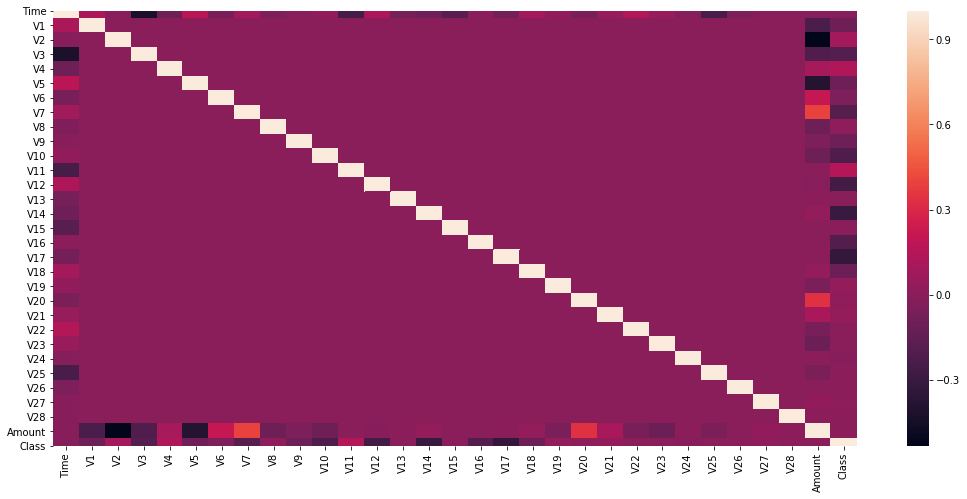

In [10]:
# checking for correlation in the data

plt.figure(figsize=(18,8))
sns.heatmap(df.corr())

In [11]:
# listing columns names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# checking for genuine v/s fraud data count
df['Class'].value_counts() # it takes .005458 sec where as if we used df.groupby('Class').count()['Amount'] than it takes .060615 sec

0    284315
1       492
Name: Class, dtype: int64

In [13]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/df.shape[0] * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/df.shape[0] * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

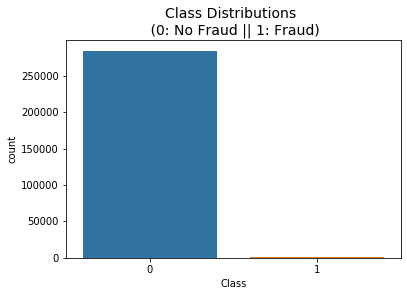

In [14]:
# Box plot showcasing fraud and genuine transaction
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

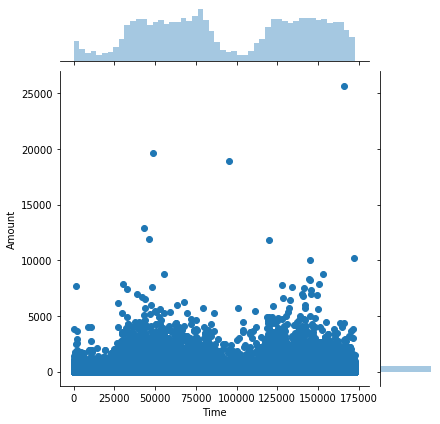

In [15]:
sns.jointplot(x='Time', y='Amount', data=df)

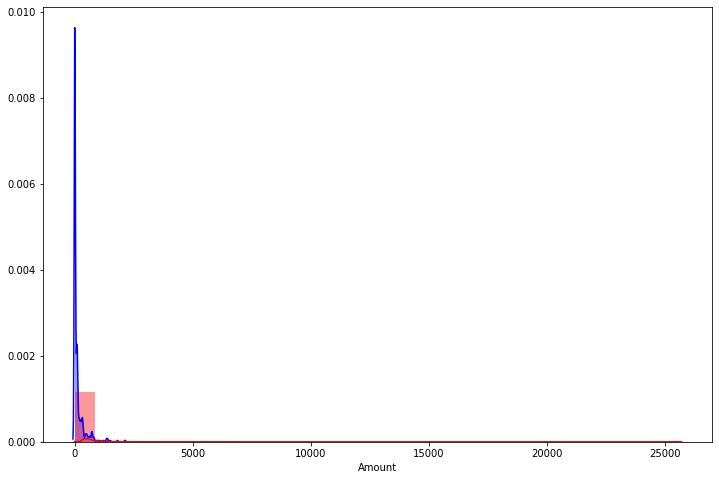

In [16]:
fraud_df = df[df['Class']==1]
genuine_df = df[df['Class']==0]
plt.figure(figsize=(12,8))
sns.distplot(fraud_df['Amount'], bins=30, color='blue')
sns.distplot(genuine_df['Amount'], bins=30, color='red')

## 3. Machine Learning
### We start with the Machine learning 

1. We will start with importing relevant libraries for ML
2. Splitting the data into train/validation/test sets
3. Baselining the model with Naive Predictor - assuming if all predicting value is of one category and also running the model with Logistic regression model
4. Since we now have a baseline, we will try improving the model by 
 * Balaning the dataset via SMOTE function and 
 * Normalising the dataset
 * Note: this will be applied only on test dataset 
5. Now we will run the model on different algorithm (we have a binary classification problem statement ) 
 * Logistic Regression
 * KNN Classifier
 * Decision Tree Classifier
 * Random Forest Classifier
 * Gradient Boosting Classifier
 * GaussianNB
 * SVC
 * BaggingClassifier
 * ExtraTreesClassifier
 * XGBClassifier
 * AdaBoostClassifier
6. Apply Hyperparameter tuning on top 3 models


* Observation: Since we have a Imbalanced dataset we need to not only check for accuracy but also for Fi Score.

### Importing relevant libraries for Machine Learning

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, make_scorer#, cohen_kappa_score, matthews_corrcoef 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import time, re#, pickle
from joblib import dump, load

random_state= 101
beta = 1.5

Using TensorFlow backend.


#### We need not only split the data and also balance the train data set and apply min-max scaller on the train dataset

* split the data in 3 different dataset (train, validation and test)
* create and baseline model based with existing data
* apply SMOTE on train dataset and synthesis the data, so it is evenly distributed
* apply min max scaller on existing data on
* run naive_predictor_accuracy and assume all class as 1 and check model accuracy
* create model on following  
    - LogisticRegression
    - KNeighborsClassifier
    - DecisionTreeClassifier
    - RandomForestClassifier
    - GaussianNB
    - SVC
    - BaggingClassifier
    - ExtraTreesClassifier
    - XGBClassifier
* at last choose the 2 best models and apply hyper parameter tuning

### Developing a logistic regrssion mode as baseline model without - scalling and applying SMOTE

In [18]:
# Creating X and y splitting the dataset, since we have Time lets see and compare the result by have Time as an index and otherwise

X = df.set_index('Time')
X = df.drop(['Class', 'Time'], axis=1)

#X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=random_state)

In [19]:
print(' X Train:', X_train.shape, 'y Train:', y_train.shape, '\n','X Test:', X_test.shape, 'y Test:',y_test.shape, '\n X Val:', X_val.shape, 'y Val:',y_val.shape)

 X Train: (127849, 29) y Train: (127849,) 
 X Test: (93987, 29) y Test: (93987,) 
 X Val: (62971, 29) y Val: (62971,)


In [20]:
# Create Dataframe to store model details

model_df = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1 Score', 'Recall', 'Precision', 'F1 beta'])

In [21]:
# Trying to baseline the model with 30 columns - with validation test
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train) #fit the model on train set
predictions = logmodel.predict(X_val) # predict the validation

cm = confusion_matrix(y_val,predictions) # compare the predicted value v/s actual value
tn, fp, fn, tp = cm.ravel()

clf_accuracy = accuracy_score(y_val,predictions)
clf_f1_score = f1_score(y_val,predictions)
clf_recall_score = recall_score(y_val,predictions)
clf_precision_score = precision_score(y_val,predictions)
clf_fbeta_score = fbeta_score(y_val,predictions, beta)

#cohen_kappa_score(y_val,predictions)
#matthews_corrcoef(y_val,predictions)

In [22]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62877
           1       0.84      0.55      0.67        94

    accuracy                           1.00     62971
   macro avg       0.92      0.78      0.83     62971
weighted avg       1.00      1.00      1.00     62971



In [23]:
print("Confusion Matrix:\n", cm, "\n True Negative: :", tn, "False Positive: :",fp, "False Negative: :",fn, "True Positive: :",tp)

Confusion Matrix:
 [[62867    10]
 [   42    52]] 
 True Negative: : 62867 False Positive: : 10 False Negative: : 42 True Positive: : 52


In [24]:
model_df = model_df.append({'Model Name': "Logistic Regression - Baselining - Train", 'Accuracy': clf_accuracy, 'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 'Precision': clf_precision_score, 'F1 beta':clf_fbeta_score }, ignore_index=True)

model_df

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
0,Logistic Regression - Baselining - Train,0.999174,0.666667,0.553191,0.83871,0.617916


### Analysis as follows:
- Accuracy is good, but we have a biased dataset hence we need to also look at other matrics
- Recall, Precision and F score is not as high as accuracy. 
- Lets apply SMOTE - increase minority class and apply min max scaller so no other column can incluence the data

In [25]:
# Before we proceed further, lets see how it works on test data set

predictions = logmodel.predict(X_test) # predicting the test set

clf_accuracy = accuracy_score(y_test,predictions)
clf_f1_score = f1_score(y_test,predictions)
clf_recall_score = recall_score(y_test,predictions)
clf_precision_score = precision_score(y_test,predictions)
clf_fbeta_score = fbeta_score(y_test,predictions, beta)
#cohen_kappa_score(y_val,predictions)
#matthews_corrcoef(y_val,predictions)

In [26]:
model_df = model_df.append({'Model Name': "Logistic Regression - Baselining - Test", 'Accuracy': clf_accuracy, 'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 'Precision': clf_precision_score, 'F1 beta':clf_fbeta_score }, ignore_index=True)

model_df.sort_values(['Accuracy', 'F1 Score'], ascending=False) 

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
0,Logistic Regression - Baselining - Train,0.999174,0.666667,0.553191,0.83871,0.617916
1,Logistic Regression - Baselining - Test,0.999159,0.697318,0.579618,0.87500,0.646802


In [27]:
confusion_matrix(y_test,predictions)

array([[93817,    13],
       [   66,    91]])

#### Apply SMOTE and minmax scaller

In [28]:
sm = SMOTE(random_state=101)

In [29]:
X_smote_train, y_smote_train = sm.fit_resample(X_train,y_train)

In [30]:
X_features = df.drop(['Class','Time'], axis=1).columns
#y_features = df.columns[-1]
X_smote_train = pd.DataFrame(X_smote_train, columns=X_features)
yy_smote_train = pd.DataFrame(y_smote_train, columns={'Class'})

In [31]:
X_smote_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.955927,-0.218482,-0.251377,0.419196,-0.499967,-0.424694,-0.428915,-0.060773,1.058540,-0.215643,...,-0.132069,-0.141178,-0.235147,0.442228,1.074028,-0.432335,-0.679652,0.041198,-0.017479,9.99
1,-0.255771,0.544112,1.892145,0.180881,-0.612546,-0.329600,0.486048,-0.220560,-0.414217,0.260808,...,0.238574,-0.000541,0.155052,0.049828,0.591713,-0.822597,1.023059,-0.190003,-0.115842,46.53
2,-0.285772,-0.299225,0.969301,-2.193761,0.027015,0.230702,0.026279,0.131954,-1.062120,0.012534,...,0.267119,0.077120,0.010364,0.033881,-1.121741,-0.538164,-0.500117,0.142476,0.161809,65.00
3,-1.893824,-0.132043,0.812274,-0.649386,-1.627147,0.104617,2.006135,0.329641,0.220353,-1.880134,...,0.916418,-0.117693,-1.083467,0.919937,-0.086851,0.726124,-0.943609,0.033538,0.101904,470.34
4,-0.661944,0.469235,0.276444,-0.924058,1.902695,4.151178,-0.637963,0.247560,0.277781,-0.401264,...,-0.147393,0.843918,0.001868,-0.150634,1.052090,0.227546,0.481241,-0.047593,0.025814,29.99


In [32]:
y_smote_train

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
df_smote_train = pd.concat([X_smote_train, yy_smote_train],axis=1)
df_smote_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.955927,-0.218482,-0.251377,0.419196,-0.499967,-0.424694,-0.428915,-0.060773,1.058540,-0.215643,...,-0.141178,-0.235147,0.442228,1.074028,-0.432335,-0.679652,0.041198,-0.017479,9.99,0
1,-0.255771,0.544112,1.892145,0.180881,-0.612546,-0.329600,0.486048,-0.220560,-0.414217,0.260808,...,-0.000541,0.155052,0.049828,0.591713,-0.822597,1.023059,-0.190003,-0.115842,46.53,0
2,-0.285772,-0.299225,0.969301,-2.193761,0.027015,0.230702,0.026279,0.131954,-1.062120,0.012534,...,0.077120,0.010364,0.033881,-1.121741,-0.538164,-0.500117,0.142476,0.161809,65.00,0
3,-1.893824,-0.132043,0.812274,-0.649386,-1.627147,0.104617,2.006135,0.329641,0.220353,-1.880134,...,-0.117693,-1.083467,0.919937,-0.086851,0.726124,-0.943609,0.033538,0.101904,470.34,0
4,-0.661944,0.469235,0.276444,-0.924058,1.902695,4.151178,-0.637963,0.247560,0.277781,-0.401264,...,0.843918,0.001868,-0.150634,1.052090,0.227546,0.481241,-0.047593,0.025814,29.99,0


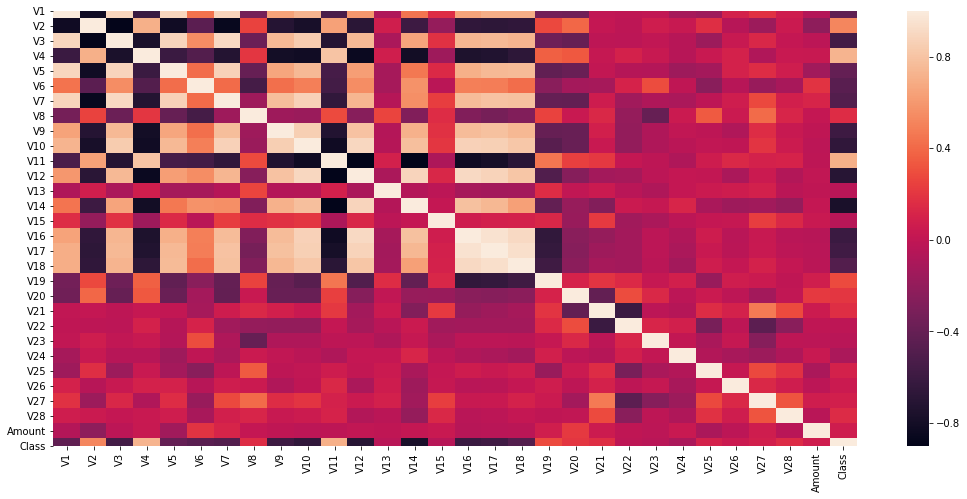

In [34]:
# post applying SMOTE, and checking the correlation of data
plt.figure(figsize=(18,8))
sns.heatmap(df_smote_train.corr())

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((127849, 29), (127849,), (93987, 29), (93987,), (62971, 29), (62971,))

In [36]:
# Appling MinMaxScaler (fit and transform) on train data and only transform on test data to avoid data leakages 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [37]:
# baselining the model - assuming all values were zeros than we will have 99,8% accuracy. further tuning should not only improve the accuracy but also F score

naive_predictor_accuracy = accuracy_score(y_train,np.zeros(len(y_train)))
naive_predictor_f1score = f1_score(y_train, np.zeros(len(y_train)))

print("Naive predictor accuracy: %.3f" % (naive_predictor_accuracy))
print("Naive predictor f1-score: %.3f" % (naive_predictor_f1score))

Naive predictor accuracy: 0.998
Naive predictor f1-score: 0.000


In [38]:
model_performance = []

classifier_type = [LogisticRegression,
                    KNeighborsClassifier,
                    DecisionTreeClassifier,
                    RandomForestClassifier,
                    GradientBoostingClassifier,
                    GaussianNB,
                    SVC, 
                    BaggingClassifier,
                    ExtraTreesClassifier,
                    XGBClassifier, 
                    AdaBoostClassifier]


#model_df = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1 Score', 'Recall', 'Precision', 'F1 beta'])


for mName in classifier_type:
    model_name = mName
    model_name = str(model_name)
    model = mName()
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    print(mName,':- ') 
    print(classification_report(y_val,predictions))
    print('-------------------------------------------------------------')
    print(confusion_matrix(y_val,predictions))
    print('-------------------------------------------------------------')
    clf_accuracy = accuracy_score(y_val,predictions)
    clf_f1_score = f1_score(y_val,predictions)
    clf_recall_score = recall_score(y_val,predictions)
    clf_precision_score = precision_score(y_val,predictions)
    clf_fbeta_score = fbeta_score(y_val,predictions, beta)
    print('-------------------------------------------------------------')
    #print("%s model accuracy-score: %.3f" % (mName, clf_accuracy))
    #print("%s model f1-score: %.3f" % (mName, clf_f1_score))
    #print("%s model recall-score: %.3f" % (mName, clf_recall_score))
    #print("%s model precision-score: %.3f" % (mName, clf_precision_score))
    
    nameLen = len(model_name.split('.'))
    model_name = model_name.split('.')[nameLen-1]
    model_name= re.sub('[^A-Za-z0-9]+', '', model_name)
    model_df = model_df.append({'Model Name': model_name, 'Accuracy': clf_accuracy, 
                                'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 
                                'Precision': clf_precision_score, 
                                'F1 beta':clf_fbeta_score}, ignore_index=True)

    
model_df = model_df.sort_values(['Accuracy', 'F1 Score'], ascending=False)
#model_df = model_df.reset_index(drop=True)
model_df

<class 'sklearn.linear_model._logistic.LogisticRegression'> :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62877
           1       0.87      0.44      0.58        94

    accuracy                           1.00     62971
   macro avg       0.94      0.72      0.79     62971
weighted avg       1.00      1.00      1.00     62971

-------------------------------------------------------------
[[62871     6]
 [   53    41]]
-------------------------------------------------------------
-------------------------------------------------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62877
           1       0.94      0.71      0.81        94

    accuracy                           1.00     62971
   macro avg       0.97      0.86      0.91     62971
weighted avg       1.00      1.00      1.00     629

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
11,XGBClassifier,0.999587,0.845238,0.755319,0.959459,0.808231
5,RandomForestClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
9,BaggingClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
10,ExtraTreesClassifier,0.999539,0.826347,0.734043,0.945205,0.788225
3,KNeighborsClassifier,0.999508,0.812121,0.712766,0.943662,0.770796
8,SVC,0.999460,0.808989,0.765957,0.857143,0.791878
4,DecisionTreeClassifier,0.999301,0.755556,0.723404,0.790698,0.742857
12,AdaBoostClassifier,0.999254,0.728324,0.670213,0.797468,0.704819
0,Logistic Regression - Baselining - Train,0.999174,0.666667,0.553191,0.838710,0.617916
1,Logistic Regression - Baselining - Test,0.999159,0.697318,0.579618,0.875000,0.646802


We can see from - 8 models have worked better than the baseline logistic model. The difference in accuracy between the top 4 models is 0,000048 - not much too compare but we need to keep in mind that the dataset is biased hence we should also consider the F1 score. The difference between the top 4 F1 scores is 0,018891. Since all top 4 models, accuracy, and F1 range are in very narrow range hence, let's try implementing hyper-parameter tuning on all the 4 models and see the best model with test data. 


## 4. Applying Hyper-parameter tuning to improve the model

In [39]:
# Working model
from sklearn.model_selection import StratifiedShuffleSplit
#etc = ExtraTreesClassifier((max_depth=3, max_features='auto', n_estimators=400).fit(X_train, y_train))
etc = ExtraTreesClassifier(n_estimators=400)

"""etc = ExtraTreesClassifier(n_estimators=400, 
                           max_depth=None, min_samples_split=4, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           min_impurity_split=None, bootstrap=False, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                           class_weight=None, ccp_alpha=0.0, max_samples=None)"""

# set up cv and and randomized grid search
cv_method = StratifiedShuffleSplit(n_splits=5, random_state=random_state)
model = ExtraTreesClassifier(n_estimators=400)#random_state=random_state, class_weight = 'balanced_subsample')
param_grid = {'max_features': [3, 4, 5, 6, 7, 8, 9]}

etc = RandomizedSearchCV(estimator=model,
              param_distributions=param_grid,
              n_iter=5,
              cv=cv_method,
              verbose=2,
              random_state=random_state,
              n_jobs=-2)

# fit/ train random model
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)

print(classification_report(y_test,predictions))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  25 out of  25 | elapsed: 12.6min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.94      0.79      0.86       157

    accuracy                           1.00     93987
   macro avg       0.97      0.89      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [40]:
cm = confusion_matrix(y_test,predictions) # compare the predicted value v/s actual value
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:\n", cm, "\n True Negative: :", tn, "False Positive: :",fp, "False Negative: :",fn, "True Positive: :",tp)

Confusion Matrix:
 [[93822     8]
 [   33   124]] 
 True Negative: : 93822 False Positive: : 8 False Negative: : 33 True Positive: : 124


In [41]:
clf_accuracy = accuracy_score(y_test,predictions)
clf_f1_score = f1_score(y_test,predictions)
clf_recall_score = recall_score(y_test,predictions)
clf_precision_score = precision_score(y_test,predictions)
clf_fbeta_score = fbeta_score(y_test,predictions, beta)

model_df = model_df.append({'Model Name': "ExtraTreesClassifier - Test Set", 'Accuracy': clf_accuracy, 'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 'Precision': clf_precision_score, 'F1 beta': clf_fbeta_score }, ignore_index=True)


In [42]:
model_df.sort_values('Accuracy', ascending=False)

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
0,XGBClassifier,0.999587,0.845238,0.755319,0.959459,0.808231
1,RandomForestClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
2,BaggingClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
13,ExtraTreesClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
3,ExtraTreesClassifier,0.999539,0.826347,0.734043,0.945205,0.788225
4,KNeighborsClassifier,0.999508,0.812121,0.712766,0.943662,0.770796
5,SVC,0.999460,0.808989,0.765957,0.857143,0.791878
6,DecisionTreeClassifier,0.999301,0.755556,0.723404,0.790698,0.742857
7,AdaBoostClassifier,0.999254,0.728324,0.670213,0.797468,0.704819
8,Logistic Regression - Baselining - Train,0.999174,0.666667,0.553191,0.838710,0.617916


Text(0.5, 1.0, 'Extra Tree Classifier Estimated Feature Importance')

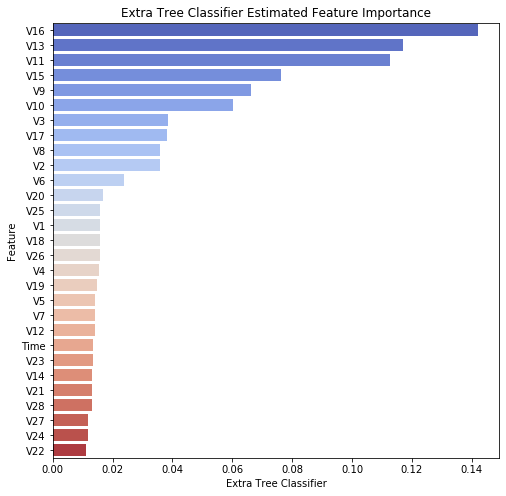

In [43]:
features = df.drop(['Class'], axis=1).columns
relative_importance = etc.best_estimator_.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(features,
                          relative_importance)),
                 columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("coolwarm", feature_importance.shape[0])

plt.figure(figsize=(8, 8))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)
plt.xlabel('Extra Tree Classifier')
plt.ylabel('Feature')
plt.title('Extra Tree Classifier Estimated Feature Importance')

In [44]:
feature_importance

,feature,relativeimportance
0,V16,0.142127
1,V13,0.116976
2,V11,0.112680
3,V15,0.076344
4,V9,0.066386
5,V10,0.060317
6,V3,0.038386
7,V17,0.038200
8,V8,0.035910
9,V2,0.035785


In [45]:
# Applying test data on XGBClassifier - on test set

gbm = XGBClassifier(max_depth=3, n_estimators=400, learning_rate=0.05).fit(X_train, y_train)
predictions = gbm.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.93      0.80      0.86       157

    accuracy                           1.00     93987
   macro avg       0.97      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [46]:
confusion_matrix(y_test, predictions)

array([[93821,     9],
       [   31,   126]])

In [47]:
#By tuning hyper parameter on XGB Classifier model - check model performance

clf_xgb = XGBClassifier(objective = 'binary:logistic')

param_dist = {'n_estimators': [400],
              'learning_rate': [.10, .01, .001, .001],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'subsample': [.3, .4, .5, .6, .7, .8, .9],
              'colsample_bytree': [.5, .6, .7, .8, .9],
              'min_child_weight': [1, 2, 3, 4]
             }

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         n_iter = 5, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.4min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.94      0.79      0.86       157

    accuracy                           1.00     93987
   macro avg       0.97      0.89      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [48]:
clf_accuracy = accuracy_score(y_test,predictions)
clf_f1_score = f1_score(y_test,predictions)
clf_recall_score = recall_score(y_test,predictions)
clf_precision_score = precision_score(y_test,predictions)
clf_fbeta_score = fbeta_score(y_test,predictions, beta)


model_df = model_df.append({'Model Name': "XGBClassifier - Test Set", 'Accuracy': clf_accuracy, 'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 'Precision': clf_precision_score, 'F1 beta': clf_fbeta_score }, ignore_index=True)

In [49]:
model_df.sort_values(['Accuracy','F1 Score'], ascending=False)

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
0,XGBClassifier,0.999587,0.845238,0.755319,0.959459,0.808231
1,RandomForestClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
2,BaggingClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
13,ExtraTreesClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
14,XGBClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
3,ExtraTreesClassifier,0.999539,0.826347,0.734043,0.945205,0.788225
4,KNeighborsClassifier,0.999508,0.812121,0.712766,0.943662,0.770796
5,SVC,0.999460,0.808989,0.765957,0.857143,0.791878
6,DecisionTreeClassifier,0.999301,0.755556,0.723404,0.790698,0.742857
7,AdaBoostClassifier,0.999254,0.728324,0.670213,0.797468,0.704819


Text(0.5, 1.0, 'XGBClassifier Estimated Feature Importance')

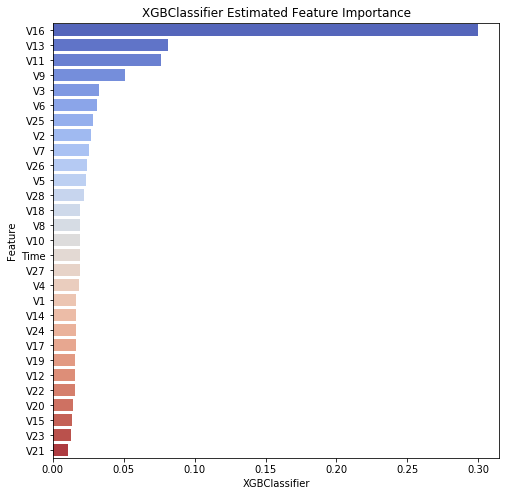

In [50]:
features = df.drop(['Class'], axis=1).columns
relative_importance = clf.best_estimator_.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(features,
                          relative_importance)),
                 columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("coolwarm", feature_importance.shape[0])

plt.figure(figsize=(8, 8))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)

plt.xlabel('XGBClassifier')
plt.ylabel('Feature')
plt.title('XGBClassifier Estimated Feature Importance')

In [51]:
feature_importance

,feature,relativeimportance
0,V16,0.299744
1,V13,0.081401
2,V11,0.076274
3,V9,0.051112
4,V3,0.032577
5,V6,0.031356
6,V25,0.028563
7,V2,0.026806
8,V7,0.025266
9,V26,0.024328


In [52]:

#from sklearn.metrics import fbeta_score
scorer = make_scorer(fbeta_score, beta=0.5)

rf_clf = RandomForestClassifier(random_state=random_state)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Number of trees in random forest
n_estimators = [10, 30, 50, 100, 150, 200, 250, 300]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(3, 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': [True, False],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf_clf,
                               param_distributions = random_grid,
                               scoring=scorer,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=random_state,
                               n_jobs = 3)

rf_random.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 12.8min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 47.9min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 96.1min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.94      0.79      0.86       157

    accuracy                           1.00     93987
   macro avg       0.97      0.89      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [53]:
clf_accuracy = accuracy_score(y_test,predictions)
clf_f1_score = f1_score(y_test,predictions)
clf_recall_score = recall_score(y_test,predictions)
clf_precision_score = precision_score(y_test,predictions)
clf_fbeta_score = fbeta_score(y_test,predictions, beta)


model_df = model_df.append({'Model Name': "Random Forest - Test Set", 'Accuracy': clf_accuracy, 'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 'Precision': clf_precision_score, 'F1 beta': clf_fbeta_score }, ignore_index=True)


In [54]:
model_df.sort_values(['Accuracy', 'F1 Score'], ascending=False)

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
0,XGBClassifier,0.999587,0.845238,0.755319,0.959459,0.808231
1,RandomForestClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
2,BaggingClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
13,ExtraTreesClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
14,XGBClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
15,Random Forest - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
3,ExtraTreesClassifier,0.999539,0.826347,0.734043,0.945205,0.788225
4,KNeighborsClassifier,0.999508,0.812121,0.712766,0.943662,0.770796
5,SVC,0.999460,0.808989,0.765957,0.857143,0.791878
6,DecisionTreeClassifier,0.999301,0.755556,0.723404,0.790698,0.742857


Text(0.5, 1.0, 'Random Forest Estimated Feature Importance')

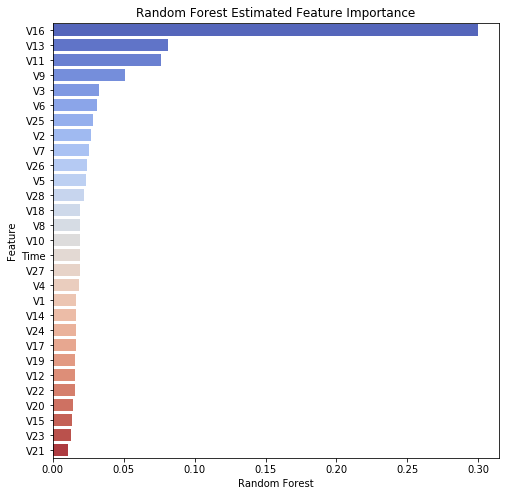

In [55]:
features = df.drop(['Class'], axis=1).columns
relative_importance = clf.best_estimator_.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(features,
                          relative_importance)),
                 columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("coolwarm", feature_importance.shape[0])

plt.figure(figsize=(8, 8))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)
plt.xlabel('Random Forest')
plt.ylabel('Feature')
plt.title('Random Forest Estimated Feature Importance')

In [56]:
feature_importance

,feature,relativeimportance
0,V16,0.299744
1,V13,0.081401
2,V11,0.076274
3,V9,0.051112
4,V3,0.032577
5,V6,0.031356
6,V25,0.028563
7,V2,0.026806
8,V7,0.025266
9,V26,0.024328


In [57]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5),
                   n_estimators = 100, max_features = 0.5),
                   param_grid)#, scoring = choosen_scoring)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))

clf_accuracy = accuracy_score(y_test,predictions)
clf_f1_score = f1_score(y_test,predictions)
clf_recall_score = recall_score(y_test,predictions)
clf_precision_score = precision_score(y_test,predictions)
clf_fbeta_score = fbeta_score(y_test,predictions, beta)


model_df = model_df.append({'Model Name': "BaggingClassifier - Test Set", 'Accuracy': clf_accuracy, 'F1 Score': clf_f1_score, 'Recall': clf_recall_score, 'Precision': clf_precision_score, 'F1 beta': clf_fbeta_score }, ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.93      0.72      0.81       157

    accuracy                           1.00     93987
   macro avg       0.96      0.86      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [58]:
model_df.sort_values(['Accuracy', 'F1 Score'], ascending=False)

,Model Name,Accuracy,F1 Score,Recall,Precision,F1 beta
0,XGBClassifier,0.999587,0.845238,0.755319,0.959459,0.808231
1,RandomForestClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
2,BaggingClassifier,0.999571,0.838323,0.744681,0.958904,0.799649
13,ExtraTreesClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
14,XGBClassifier - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
15,Random Forest - Test Set,0.999564,0.858131,0.789809,0.939394,0.830500
3,ExtraTreesClassifier,0.999539,0.826347,0.734043,0.945205,0.788225
4,KNeighborsClassifier,0.999508,0.812121,0.712766,0.943662,0.770796
5,SVC,0.999460,0.808989,0.765957,0.857143,0.791878
16,BaggingClassifier - Test Set,0.999436,0.810036,0.719745,0.926230,0.772751


### Conclusion

Post baselining multiple model with minimum parameter, of the entire list, top 4 models as as follows:
* XGBClassifier	
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier

Difference in accuracy between top 4 models is 0,000048 - not much too compare but we need to keep in mind that the dataset is biased hence we should also take F1 score in consideration. Difference between the top 4 F1 score is 0,018891. Since all top 4 models accuracy and F1 range is in very narrow range hence, implemented hyper-parameter tuning on all the 4 models and tested the model with test data.

ExtraTreeClassifier, XGBClassifier and Random Forest have scored the same on test data set. 

Top 5 hyper-parametrised model important features, most influencing featured are V16, V13, v11, v9 are common in all 3 models and v16 contributing been the highest influencer. Common features in Extratree are contributing to 43,81 % whereas XGM and Random Forest are contributing to 50,85%.

Since XGB is more scalable and accurate on gradient boosting ML models and it has proven to push the limits of computing power for boosted tree algorithms off model performance and computational speed. Hence, the suggestion is to go for the XGB model for production deployment.


### Reflection 

This project can be broken down into phases based on my encounter; 
* Getting the dataset - this was the easiest phase for me as the dimension of the data had already been reduced into Principal Components.
* Exploratory data analysis - as the data set was clean, not many activities had to be done except getting familiar with the data.
* Model Selection - we had skewed data and choosing the right model was one of the most challenging tasks with running the model on multiple models and choosing the best models for hyper-parameter training.

### Improvement 

We can improve the model score by using unsupervised learning multi-layer models.

# End